# Caminata aleatorea en 2 dimensiones

##### Se busca modelar la proliferación de una enfermeda, como un virus, sobre una población. Se debe tener en cuenta que el uso de este modelo implica una simplificación a las variables que requiere el problema en cuestión. Por lo tanto será un modelo sencillo. 

In [2]:
#Primero, importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Inicialmente, vamos a definir las direcciones que puedem tomar en la grilla la enfermedad
def direction():
    direc = np.array([[1,0], [-1,0], [0,1], [0,-1]]) # Hacia el este, hacia el oeste, hacia arriba y hacia abajo
    return direc[np.random.choice([0,1,2,3])] # tomará un valor aleatoreo entre 0 y 3 que dentro de direc es una dirección

# Definimos la función para la caminata aleatorea
def random_walk_2d(N,x,y,n):
    next_x = np.zeros((N))
    next_y = np.zeros((N))
    
    # Queremos que se genere un paso aleatoreo en una dirección aleatorea
    direc_x = direction()[0]
    direc_y = direction()[1]
    for i in range(n):
        next_x[i] = direc_x + x[i]
        next_y[i] = direc_y + y[i]
    
    return next_x, next_y  


In [4]:
# Definimos condiciones del problema
N = 200 # número de pasos
n = 200 # cantidad de personas en la población
i_infected = 6 # número inicial de infectados 
probability = 0.7 #probabilidad de contagio

# Definimos el tamaño de nuestra red teniendo en cuenta que debe ser 2N+1 en cada dirección
lattice = 201

# Ahora, estableceremos el array de valores para x y para y
x = np.random.randint(0, lattice + 1, n)
y = np.random.randint(0, lattice + 1, n)

# infectamos a personas de forma aleatorea
infect = np.random.choice(range(n), i_infected, replace=False)
infected = infect.tolist()
ran_values = [round(random.random(),2) for i in range(n)]

# Creamos una lista que guarde las posicisiones en un tiempo dado
det_x = [x]
det_y = [y]
infected_t = [infected]
counter = 0

# Se analizará la camianta aleatorea para cada eje teniendo en cuenta la infección
for i in range(N):
    directions = random_walk_2d(N,x,y,n)
    position_x = directions[0]
    position_y = directions[1]
    
    #comprobar si la persona infectó a otra
    if i in infected:
        # recorremos a toda la población para comprobar si infectó a alguien
        for cada in range(n):
            if cada != i and ran_values[cada] < probability:
                # Veamos si por un proceso aleatoreo, la persona se contagio
                # La persona se infecta si un num entre 0 y 1 es menor a la proba de contagio
                infected.append(cada)
                infected_t.append(infected.copy())

# Agrgamos en cada iteración de las posiciones en la lista de posiciones en el timpo, con el fin de poder rastrear el contagio
    det_x.append(position_x)
    det_y.append(position_y)

    
    

In [5]:
# Gráficamos los datos obtenidos
# Crearemos el gráfico para observar de un color las personas infectadas y otro color para aqullos que no estan infectados
def infected_time(det_x, det_y, n, infected, time):
    not_sane_x = []
    not_sane_y = []
    sane_x = []
    sane_y = []    
    
    #Time es una variable para el tiempo que tiene la misma logitud de det_x y det_y
    for i in range(n):
        if i in infected[time]:
            
            # infected_t[tiempo] toma los infectados para ese tiempo en específico
            # vamos a meter en dos listas, una para cada dirección, las personas que estan infectadas
            not_sane_x.append(det_x[time][i])
            not_sane_y.append(det_y[time][i])
        else:
            
            # haremos lo mismo para que en las listas not_sane para guardar a ñas personas sanas
            sane_x.append(det_x[time][i]) 
            sane_y.append(det_y[time][i]) 
    
    # lista que contiene las coordenadas de las personas que est´sn sanas y de las que están infectadas
    result = [sane_x, sane_y, not_sane_x, not_sane_y]
    return result
        
# Sacamos las coordenadas para personas infectadas y no infectadas para 4 tiempos aleatoreos


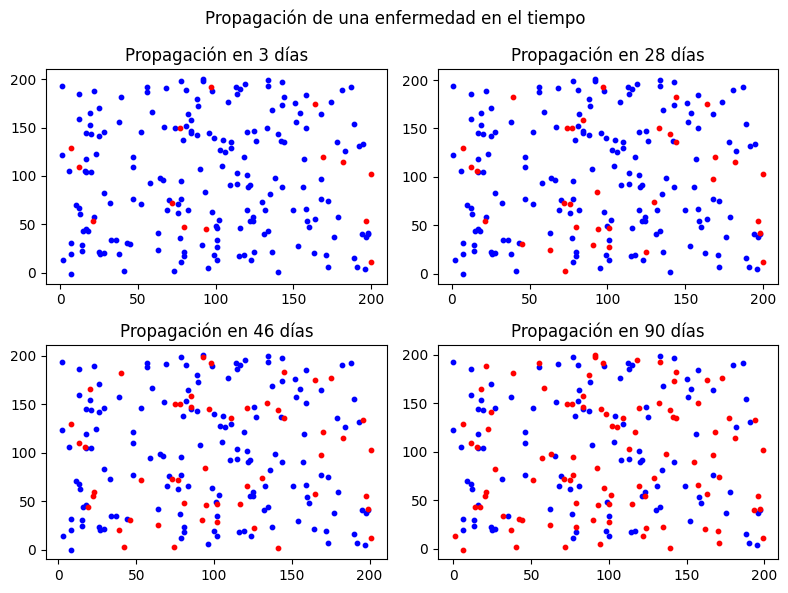

In [6]:
# Decimos que el tiempo esta dado por días de forma arbitrarea        
poblation1 = infected_time(det_x, det_y, N, infected_t, 8)
poblation2 = infected_time(det_x, det_y, N, infected_t, 28)
poblation3 = infected_time(det_x, det_y, N, infected_t, 46)
poblation4 = infected_time(det_x, det_y, N, infected_t, 90)

#Creamos el subplot para ver el efecto de contagio
fig, axs = plt.subplots(2, 2)

#Gráficamos las coordenadas de cada persona (infectada y no infectada) en 4 subplots para los 4 tiempos
axs[0,0].scatter(poblation1[0], poblation1[1], c='blue', s=10, label = 'personas sanas') 
axs[0,0].scatter(poblation1[2], poblation1[3], c='red', s=10, label = 'personas infectadas')
axs[0,0].set_title('Propagación en 3 días')
axs[0,0].grid()

axs[0,1].scatter(poblation2[0], poblation2[1], c='blue', s=10, label = 'personas sanas') 
axs[0,1].scatter(poblation2[2], poblation2[3], c='red', s=10, label = 'personas infectadas')
axs[0,1].set_title('Propagación en 28 días')
axs[0,0].grid()

axs[1,0].scatter(poblation3[0], poblation3[1], c='blue', s=10, label = 'personas sanas') 
axs[1,0].scatter(poblation3[2], poblation3[3], c='red', s=10, label = 'personas infectadas')
axs[1, 0].set_title('Propagación en 46 días')
axs[0,0].grid()

axs[1,1].scatter(poblation4[0], poblation4[1], c='blue', s=10, label = 'personas sanas') 
axs[1,1].scatter(poblation4[2], poblation4[3], c='red', s=10, label = 'personas infectadas') 
axs[1,1].set_title('Propagación en 90 días')
axs[0,0].grid()

#titulo del gráfico y dimensiones de la gráfica
fig.suptitle("Propagación de una enfermedad en el tiempo")
fig.set_size_inches(8, 6)

#Ajustamos la gráfica y guardamos
plt.tight_layout()
plt.savefig("Caminata aleatorea para la propagación de un virus")
plt.show()